In [132]:
%matplotlib inline
import pylab as plt
plt.style.use('fivethirtyeight')

In [31]:
import pandas as pd
# from ml import KNN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [32]:
path = 'https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/queens.csv'
df = pd.read_csv(path)
df.head(3)

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,10234,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Queens
1,10524,1950,1.0,1,950,1,3.0,83,0,0,0,0,0,0,0,0,Forest Hills,Queens
2,5465,3500,1.0,1,996,9,7.0,3,1,0,0,0,0,0,0,0,Astoria,Queens


## Prepare Data

In [33]:
y = df.rent

In [34]:
X = df.drop('rent', axis=1).select_dtypes('number')

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=123)

/Users/philippk/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Fit Model

In [36]:
model = KNeighborsRegressor(n_neighbors=3)

In [37]:
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [38]:
y_pred = model.predict(X_test)

In [39]:
# definitely correct and usually faster
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
for metric in  mean_absolute_error, mean_squared_error, r2_score:
     print(f'{metric.__name__}: {metric(y_pred, y_test)}')

mean_absolute_error: 640.3555555555556
mean_squared_error: 700313.1382716049
r2_score: -1.5599118899874753


In [40]:
df['rent'].std()

854.6123999140013

Наша модель работает ужасно... но почему?

- Существуют выбросы
- Данные не нормализированны
- Модель не умеет "убивать" глупые фичи

# Drop Id

In [41]:
X_train.drop('rental_id', axis=1, inplace=True)
X_test.drop('rental_id', axis=1, inplace=True)

/Users/philippk/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [42]:
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [43]:
y_pred = model.predict(X_test)

In [44]:
# definitely correct and usually faster
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
for metric in  mean_absolute_error, mean_squared_error, r2_score:
     print(f'{metric.__name__}: {metric(y_pred, y_test)}')

mean_absolute_error: 352.58148148148143
mean_squared_error: 252517.56419753088
r2_score: 0.5450957824077073


# Scale

In [45]:
use_cols = [ 'bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee']

In [46]:
scaler = StandardScaler()

In [47]:
# X_train_s = scaler.fit_transform(X_train)
# X_test_s = scaler.fit_transform(X_test)

X_train_s = scaler.fit_transform(X_train[use_cols])
X_test_s = scaler.fit_transform(X_test[use_cols])

/Users/philippk/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/philippk/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/philippk/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/philippk/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [48]:
model.fit(X_train_s, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [49]:
y_pred = model.predict(X_test_s)

In [50]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
for metric in  mean_absolute_error, mean_squared_error, r2_score:
     print(f'{metric.__name__}: {metric(y_pred, y_test)}')

mean_absolute_error: 311.81851851851854
mean_squared_error: 243635.74691358022
r2_score: 0.5428204696087342


# Handling Categorical

In [51]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [61]:
# ?LabelEncoder

In [62]:
LE = LabelEncoder()
LE.fit(['Manhattan', 'Queens', 'Brooklyn'])

LabelEncoder()

In [75]:
OH = OneHotEncoder(handle_unknown='ignore')

In [86]:
# OH.fit_transform(df[['borough']])

## Using frequency as a feature 

In [93]:
df.reindex(X_train.index)['neighborhood'].value_counts()

Astoria                106
Long Island City        79
Rego Park               37
Forest Hills            28
Sunnyside               24
Ridgewood               17
Flushing                15
Kew Gardens             14
Briarwood                7
Elmhurst                 6
Jackson Heights          6
Jamaica Estates          4
Woodside                 3
Queens Village           3
Kew Gardens Hills        2
Richmond Hill            1
South Richmond Hill      1
Corona                   1
Glendale                 1
Rockaway All             1
North Corona             1
Oakland Gardens          1
Name: neighborhood, dtype: int64

In [105]:
nab_values = (df.reindex(X_train.index)['neighborhood'].value_counts() /  len(X_train)).to_dict()

In [106]:
nabs = df['neighborhood'].map(nab_values)

In [107]:
# nabs

In [108]:
X_train['neighborhood'] = nabs.reindex(X_train.index)
X_test['neighborhood'] = nabs.reindex(X_test.index).fillna(nabs.mean())  # некоторые районы не попали в трейн !

/Users/philippk/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/philippk/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [109]:
X_train_s = scaler.fit_transform(X_train[use_cols + ['neighborhood']] )
X_test_s = scaler.fit_transform(X_test[use_cols + ['neighborhood']])

/Users/philippk/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/philippk/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/philippk/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/philippk/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [110]:
model.fit(X_train_s, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [111]:
y_pred = model.predict(X_test_s)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
for metric in  mean_absolute_error, mean_squared_error, r2_score:
     print(f'{metric.__name__}: {metric(y_pred, y_test)}')

mean_absolute_error: 261.3074074074074
mean_squared_error: 174415.7074074074
r2_score: 0.6751730637604156


## Гиперпараметры

In [113]:
from sklearn.model_selection import GridSearchCV

In [136]:
parameters = {'n_neighbors':range(1,11)}

In [137]:
cv = GridSearchCV(model, parameters, cv=5, iid=False)

In [138]:
cv.fit(X_train_s, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform'),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'n_neighbors': range(1, 11)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [139]:
cv_results = pd.DataFrame(cv.cv_results_).set_index(pd.Series(parameters['n_neighbors']))

/Users/philippk/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/philippk/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/philippk/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_

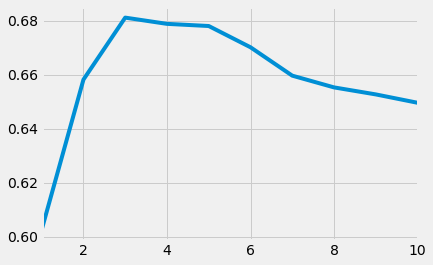

In [140]:
cv_results['mean_test_score'].plot()